## TSP using Ant Colony Algorithm

In [1]:
import random
import numpy as np
import pandas as pd
from itertools import permutations

In [2]:
class gene: # city
    def __init__(self, name, longitude, latitude):
      self.name = name
      self.longitude = longitude #x
      self.latitude = latitude #y

In [3]:
class Ant:
  def __init__(self, cost, citieslist):
    self.cost = cost
    self.citieslist = citieslist

In [4]:
class TSP:
    def __init__(self, cities_list, population_size=50, iterations=100, evaporation_rate=0.5, alpha=1, beta=1):
        self.cities_list = cities_list
        self.population_size = population_size
        self.iterations = iterations
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.distance_matrix = np.zeros((len(cities_list), len(cities_list)))
        self.phermones_matrix = np.ones((len(cities_list), len(cities_list)))

    def calc_euclidean_distance(self, current_city, neighbor_city):
      return ((current_city.longitude - neighbor_city.longitude)**2 + (current_city.latitude - neighbor_city.latitude)**2)**0.5

    def calc_distance_matrix(self):
      for i in range(len(self.cities_list)):
        for j in range(i + 1, len(self.cities_list)):  #start from i + 1
          if i==j:
            continue
          else:
            distance = self.calc_euclidean_distance(self.cities_list[i], self.cities_list[j])
            self.distance_matrix[i, j] = distance
            self.distance_matrix[j, i] = distance

    def Permutation(self):
      return np.random.permutation(self.cities_list)

    def calc_cost(self, ant):
      cost = 0
      for i in range(len(ant.citieslist)):
        current_city_index = int(ant.citieslist[i].name) - 1
        next_city_index = int(ant.citieslist[(i + 1) % len(ant.citieslist)].name) - 1
        cost += self.distance_matrix[current_city_index][next_city_index]
      ant.cost = cost

    def init_population(self):
      population = []
      for _ in range(self.population_size):
        ant = Ant(None, self.Permutation())
        self.calc_cost(ant)
        population.append(ant)
      return population

    def update_phermones_matrix(self, population):
      delta_phermones = np.zeros((len(self.cities_list), len(self.cities_list)))
      for ant in population:
        for i in range(len(self.cities_list)):
          current_city_index = int(ant.citieslist[i].name) - 1
          next_city_index = int(ant.citieslist[(i + 1) % len(ant.citieslist)].name) - 1
          delta_phermones[current_city_index][next_city_index] += 1/ant.cost
          delta_phermones[next_city_index][current_city_index] += 1/ant.cost
      self.phermones_matrix = self.phermones_matrix * (1-self.evaporation_rate) + delta_phermones

    def construction(self, population):
      new_population = []
      for ant in population:
          visited = []
          current_city = ant.citieslist[0]  # Start from the first city
          visited.append(current_city)
          while len(visited) < len(self.cities_list):
              prob = []
              city = []
              current_city_index = int(current_city.name) - 1
              for next_city in self.cities_list:
                  if next_city not in visited:
                      next_city_index = int(next_city.name) - 1
                      pij = (self.phermones_matrix[current_city_index][next_city_index] ** self.alpha) * \
                            (1 / self.distance_matrix[current_city_index][next_city_index] ** self.beta)
                      prob.append(pij)
                      city.append(next_city)
              prob_sum = sum(prob)
              if prob_sum > 0:
                  prob = [p / prob_sum for p in prob]
              prob = np.cumsum(prob)
              rand = random.random()
              selected_index = np.searchsorted(prob, rand)
              visited.append(city[selected_index])
              current_city = city[selected_index]
          new_ant = Ant(None, visited)
          self.calc_cost(new_ant)
          new_population.append(new_ant)
      return new_population




In [8]:
df = pd.read_csv("Data set CSV.csv")
df

,City,x,y
0,1,5.500000e-08,9.860000e-09
1,2,-2.887330e+01,-7.980000e-08
2,3,-7.929160e+01,-2.140330e+01
3,4,-1.465770e+01,-4.338960e+01
4,5,-6.474730e+01,2.189820e+01
5,6,-2.905850e+01,-4.321670e+01
6,7,-7.207850e+01,1.815810e-01
7,8,-3.603660e+01,-2.161350e+01
8,9,-5.048080e+01,7.374470e+00
9,10,-5.058590e+01,-2.158820e+01


In [9]:
cities_list = []
for i in range(len(df)):
  city_name = df.iloc[i, 0]
  longtitude = df.iloc[i, 1]
  latitude = df.iloc[i, 2]
  cities_list.append(gene(city_name, longtitude, latitude))

In [14]:
TSP1 = TSP(cities_list, population_size=50, iterations=50, evaporation_rate=0.5, alpha=1, beta=1)

In [15]:
TSP1.calc_distance_matrix()

In [16]:
population = TSP1.init_population()

In [17]:
old_generations = []
old_generations.append(population)

In [18]:
TSP1.update_phermones_matrix(old_generations[-1])

In [19]:
# Ant Colony Algorithm Generation
for i in range(TSP1.iterations):
  new_population = TSP1.construction(old_generations[-1])
  old_generations.append(new_population)
  TSP1.update_phermones_matrix(old_generations[-1])

  best_ant = min(old_generations[-1], key=lambda x: x.cost)

In [20]:
best_ant.cost

284.3810904080331

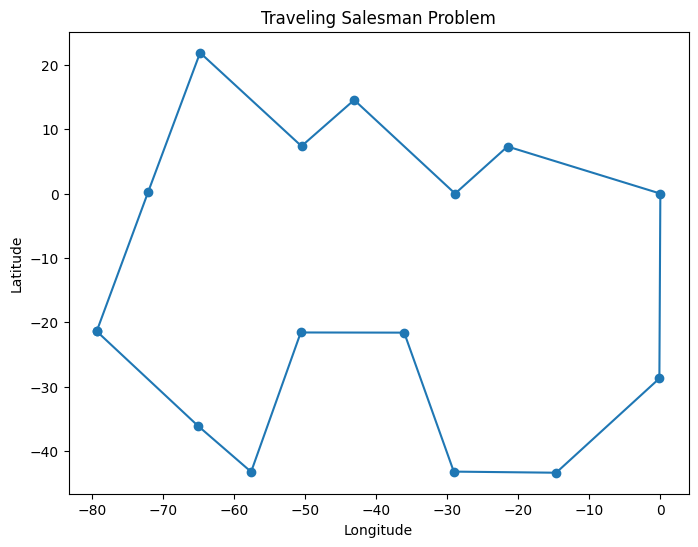

In [21]:
import matplotlib.pyplot as plt
x_coords = [city.longitude for city in best_ant.citieslist]
x_coords.append(best_ant.citieslist[0].longitude)
y_coords = [city.latitude for city in best_ant.citieslist]
y_coords.append(best_ant.citieslist[0].latitude)
plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, marker='o', linestyle='-')
plt.title('Traveling Salesman Problem')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()